<a href="https://colab.research.google.com/github/pswami12/DataScienceFiles/blob/main/Class_4_5_AIDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

**add 2 iterables a and b such that a is even and b is odd**

In [2]:
def even_odd_summation(l1, l2):
    '''This function takes two lists as input and adds even no for the first list
    and odd number the second list and returns summation result as a list'''
    return [x + y for x, y in zip(l1, l2) if x % 2 == 0 and y % 2 != 0]

In [3]:
even_odd_summation([1,2,3,4],[4,5,6,7])

[7, 11]

**strips every vowel from a string provided**

In [4]:
def vowel_stripping(string):
    '''This function takes a string as an input strips out vowels and returns stripted out string'''
    return "".join([x for x in string if x not in('a','e','i','o','u')])

In [5]:
vowel_stripping('python')

'pythn'

**acts like a ReLU function for a 1D array**

In [10]:
def relu(l1):
    '''This function takes a list as an input and acts as Relu i.e. when an element is -ve it returns 0 else the element'''
    return [0 if x < 0 else x for x in l1]

In [11]:
relu([1,2,-3,4,-8,2])

[1, 2, 0, 4, 0, 2]

**acts like a sigmoid function for a 1D array**

In [6]:
def sigmoid(l1):
    '''This function takes a list as an input and acts as sigmoid function and returns a list of sigmoid output'''
    return [(1 / (1 + math.exp(-x))) for x in l1]

In [7]:
sigmoid([1,2,-3,4,-8,2])

[0.7310585786300049,
 0.8807970779778823,
 0.04742587317756678,
 0.9820137900379085,
 0.0003353501304664781,
 0.8807970779778823]

**takes a small character string and shifts all characters by 5 (handle boundary conditions)**

In [8]:
def char_shift(string):
    '''This function takes a string as an input and shifts each character by 5 and returns shifted string'''
    return "".join([chr(ord(x)+5) if (ord(x)+5) <= 122 else chr(96 + (ord(x)+5) - 122) for x in string])

In [9]:
char_shift('python')

'udymts'

### ***Fraud_Detection_Keras_Assignment***

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

In [13]:
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [70]:
df = pd.read_csv("creditcard.csv")

In [71]:
df.shape

(85259, 31)

In [73]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [74]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes

0.0    85054
1.0      204
Name: Class, dtype: int64

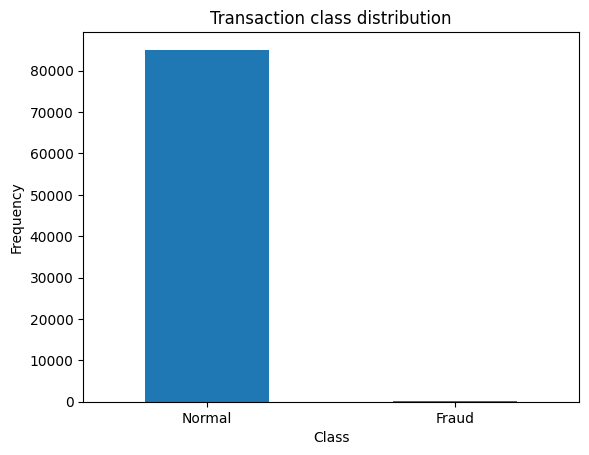

In [75]:
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
data = df.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [78]:
data.loc[:,'V1':'Amount'].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,...,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85258.000000,85258.000000,85258.000000
mean,-0.262585,-0.039207,0.679054,0.163611,-0.277616,0.094861,-0.111651,0.054145,-0.021205,-0.030836,...,0.042368,-0.029273,-0.105613,-0.037762,0.008986,0.133598,0.026270,0.001449,0.001934,98.374057
std,1.878484,1.670189,1.366683,1.363280,1.375170,1.303646,1.237707,1.223035,1.135023,1.071065,...,0.766911,0.731860,0.635127,0.626519,0.595040,0.441017,0.497236,0.389486,0.328312,268.381509
min,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,...,-19.902611,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000
25%,-1.025883,-0.602941,0.184642,-0.722311,-0.896999,-0.644375,-0.603378,-0.140721,-0.690902,-0.502986,...,-0.169875,-0.223696,-0.524879,-0.178156,-0.322420,-0.130610,-0.326403,-0.063467,-0.005899,7.680000
50%,-0.258057,0.069615,0.762733,0.186825,-0.311837,-0.155047,-0.072501,0.070103,-0.097017,-0.095056,...,-0.025239,-0.057764,-0.080822,-0.049921,0.064547,0.171852,-0.072601,0.009302,0.022947,26.990000
75%,1.153099,0.724933,1.390659,1.042062,0.257707,0.488674,0.416990,0.352738,0.602616,0.442389,...,0.170872,0.118290,0.309640,0.080706,0.405794,0.421184,0.306305,0.082480,0.076063,89.900000
max,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,...,39.420904,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000


In [79]:
data['Amount'].values

array([149.62,   2.69, 378.66, ..., 192.  ,  12.99,    nan])

In [80]:
data['Amount'].values.reshape(-1,1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [192.  ],
       [ 12.99],
       [   nan]])

In [81]:
data['Amount'].mean()

98.374056628117

In [82]:
data['Amount'].std()

268.38150943125703

In [83]:
(data['Amount'] - 98.374056628117)/268.38150943125703

0        0.190944
1       -0.356523
2        1.044356
3        0.093620
4       -0.105760
           ...   
85254   -0.292025
85255    0.084268
85256    0.348854
85257   -0.318144
85258         NaN
Name: Amount, Length: 85259, dtype: float64

In [84]:
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['Amount']

0        0.190946
1       -0.356525
2        1.044363
3        0.093621
4       -0.105761
           ...   
85254   -0.292027
85255    0.084268
85256    0.348856
85257   -0.318146
85258         NaN
Name: Amount, Length: 85259, dtype: float64

In [85]:
X = data[data.columns.difference(['Class'])]
y = data['Class']

In [86]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
85254    0.0
85255    0.0
85256    0.0
85257    0.0
85258    NaN
Name: Class, Length: 85259, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [94]:
y_train = y_train.astype(int)
counts = np.bincount(np.array(y_train))
counts

array([68047,   160])

In [95]:
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(np.array(y_train))
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 160 (0.23% of total)


In [96]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               7680      
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 139,521
Trainable params: 139,521
Non-tr

In [97]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    X_train,
    y_train,
    batch_size=2048,
    epochs=30,
    verbose=2,
    callbacks=callbacks,
    validation_data=(X_test, y_test),
    class_weight=class_weight,
)

Epoch 1/30
34/34 - 8s - loss: 1.0183e-05 - fn: 18.0000 - fp: 15388.0000 - tn: 52659.0000 - tp: 142.0000 - precision: 0.0091 - recall: 0.8875 - val_loss: nan - val_fn: 7.0000 - val_fp: 380.0000 - val_tn: 16627.0000 - val_tp: 38.0000 - val_precision: 0.0909 - val_recall: 0.8444 - 8s/epoch - 246ms/step
Epoch 2/30
34/34 - 0s - loss: 4.8502e-06 - fn: 10.0000 - fp: 1350.0000 - tn: 66697.0000 - tp: 150.0000 - precision: 0.1000 - recall: 0.9375 - val_loss: nan - val_fn: 5.0000 - val_fp: 396.0000 - val_tn: 16611.0000 - val_tp: 40.0000 - val_precision: 0.0917 - val_recall: 0.8889 - 237ms/epoch - 7ms/step
Epoch 3/30
34/34 - 0s - loss: 3.3476e-06 - fn: 8.0000 - fp: 1192.0000 - tn: 66855.0000 - tp: 152.0000 - precision: 0.1131 - recall: 0.9500 - val_loss: nan - val_fn: 5.0000 - val_fp: 327.0000 - val_tn: 16680.0000 - val_tp: 40.0000 - val_precision: 0.1090 - val_recall: 0.8889 - 255ms/epoch - 7ms/step
Epoch 4/30
34/34 - 0s - loss: 4.1329e-06 - fn: 7.0000 - fp: 1858.0000 - tn: 66189.0000 - tp: 153.0